# **Carregamento de documentos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt install build-essential libpoppler-cpp-dev pkg-config python3-dev -q

Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpoppler-cpp0v5
The following NEW packages will be installed:
  libpoppler-cpp-dev libpoppler-cpp0v5
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 36.7 kB of archives.
After this operation, 188 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp0v5 amd64 0.62.0-2ubuntu2.14 [28.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp-dev amd64 0.62.0-2ubuntu2.14 [8,676 B]

In [3]:
!pip install pdftotext -q

     |████████████████████████████████| 113 kB 5.5 MB/s 


# **Importando os documentos de petição**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdftotext
import nltk
import glob
import re

In [5]:
#Instanciando stopwords e o stemmer
# nltk.download('stopwords')
nltk.download('all')

stopwords = nltk.corpus.stopwords.words('portuguese')

stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [6]:
# Adicionar mais palavras ao stopwords criado, verificando se já existe
new_stopwords = ['br', 'pág', 'listView', 'https', 'http', 
                 'numbr','numbrª', 'ª', 'nº']
print(len(stopwords))
for word in new_stopwords:
  if word not in stopwords:
    stopwords.append(word)
print(len(stopwords))

207
216


In [7]:
def transforma_dataframe(lista_arquivos, classe):
  lista_strings = []
  for peticao in lista_arquivos:
    with open(peticao, "rb") as f:
      pdf = pdftotext.PDF(f)
    lista_strings.append("\n\n".join(pdf))

  classificacao = []
  for i in range(len(lista_arquivos)):
    classificacao.append(classe)

  df = cria_dataframe(lista_arquivos, lista_strings, classificacao)
  return df

  


def cria_dataframe(lista_arquivos, lista_strings, classificacao):
  dicionario_peticao = {
    'nome_documento': lista_arquivos,
    'conteudo_peticao': lista_strings,
    'classificacao': classificacao,
  }
  df_peticao_inicial = pd.DataFrame(dicionario_peticao)
  return df_peticao_inicial



  

In [8]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/APOSENT-ESPECIAL/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_aposentadoria_especial = transforma_dataframe(lista_arquivos, "aposentadoria_especial")

In [9]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/AUXILIO-DOENCA-PREVIDENCIARIO/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_auxilio_doenca_previdenciario = transforma_dataframe(lista_arquivos, "auxilio_doenca_previdenciario")

In [10]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/AUXILIO-EMERGENCIAL/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_auxilio_emergencial = transforma_dataframe(lista_arquivos, "auxilio_emergencial")

In [11]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/BENEFICIO-DEFICIENTE/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_beneficio_deficiente = transforma_dataframe(lista_arquivos, "beneficio_deficiente")

In [12]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/PENSAO-MORTE/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_pensao_morte = transforma_dataframe(lista_arquivos, "pensao_morte")

In [13]:
# lista_arquivos = []
# for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/APOSENT-INVALID/*pdf'):
#   if arquivo not in lista_arquivos:
#     lista_arquivos.append(arquivo)

# df_aposentadoria_invalidez = transforma_dataframe(lista_arquivos, "aposentadoria_invalidez")

In [14]:
# lista_arquivos = []
# for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/APOSENT-RURAL/*pdf'):
#   if arquivo not in lista_arquivos:
#     lista_arquivos.append(arquivo)

# df_aposentadoria_rural = transforma_dataframe(lista_arquivos, "aposentadoria_rural")

In [15]:
# lista_arquivos = []
# for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/APOSENT-URBAN/*pdf'):
#   if arquivo not in lista_arquivos:
#     lista_arquivos.append(arquivo)

# df_aposentadoria_Urbana = transforma_dataframe(lista_arquivos, "aposentadoria_urbana")

In [16]:
# lista_arquivos = []
# for arquivo in glob.glob(r'/content/drive/MyDrive/predicao_classe/AUXILIO-DOENCA/*pdf'):
#   if arquivo not in lista_arquivos:
#     lista_arquivos.append(arquivo)

# df_auxilio_doenca = transforma_dataframe(lista_arquivos, "auxilio_doenca")

In [17]:
# Concatenando os dataframes
df_peticoes_iniciais = pd.concat([df_aposentadoria_especial[:18], 
                                  df_auxilio_doenca_previdenciario[:18], 
                                  df_auxilio_emergencial[:18],
                                  df_beneficio_deficiente[:18], df_pensao_morte[:18]
                                  ], ignore_index=True)

In [18]:
df_peticoes_iniciais.head()

,nome_documento,conteudo_peticao,classificacao
0,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDER AL DO ...,aposentadoria_especial
1,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTISSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,aposentadoria_especial
2,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO(A) SENHOR(A) D...,aposentadoria_especial
3,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,aposentadoria_especial
4,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERAL DA _...,aposentadoria_especial


In [19]:
df_peticoes_iniciais['conteudo_peticao'].filter(items=[78], axis=0)

78    EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...
Name: conteudo_peticao, dtype: object

# **PLN**: Pré-processamento

In [20]:
df_peticoes_iniciais.head()

,nome_documento,conteudo_peticao,classificacao
0,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDER AL DO ...,aposentadoria_especial
1,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTISSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,aposentadoria_especial
2,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO(A) SENHOR(A) D...,aposentadoria_especial
3,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,aposentadoria_especial
4,/content/drive/MyDrive/predicao_classe/APOSENT...,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERAL DA _...,aposentadoria_especial


In [21]:
# Verificando a distribuição de classe

print(df_peticoes_iniciais['classificacao'].value_counts())

aposentadoria_especial           18
auxilio_doenca_previdenciario    18
auxilio_emergencial              18
beneficio_deficiente             18
pensao_morte                     18
Name: classificacao, dtype: int64


In [22]:
classificacao_peticoes = df_peticoes_iniciais['classificacao'].unique()

classificacao_peticoes_dicionario = {}
var = 0
for tipo_peticao in classificacao_peticoes:
  classificacao_peticoes_dicionario[tipo_peticao] = var
  var +=1


df_peticoes_iniciais['label_num'] = df_peticoes_iniciais['classificacao'].map(
    classificacao_peticoes_dicionario
)

label_ordinal_encoding = df_peticoes_iniciais[['classificacao','label_num']]
label_ordinal_encoding


,classificacao,label_num
0,aposentadoria_especial,0
1,aposentadoria_especial,0
2,aposentadoria_especial,0
3,aposentadoria_especial,0
4,aposentadoria_especial,0
...,...,...
85,pensao_morte,4
86,pensao_morte,4
87,pensao_morte,4
88,pensao_morte,4


In [23]:
classificacao_peticoes_dicionario

{'aposentadoria_especial': 0,
 'auxilio_doenca_previdenciario': 1,
 'auxilio_emergencial': 2,
 'beneficio_deficiente': 3,
 'pensao_morte': 4}

In [24]:
def clean_text(text):
  text = str(text).lower()
  text = re.sub('https?://\S+|www\.\S+', 'webaddress', text) # Substitui URLs por 'webdress'
  text = re.sub('^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', text) # Substitui os endereços de e-mail por 'emailaddress'
  text = re.sub('£|\$|R\$', 'moneysymb', text) # Substitui os símbolos de dinheiro por 'moneysymb' 
  text = re.sub('^\(?[\d]{2}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumbr', text) # Substitui números de telefone de 10 dígitos (os formatos incluem parênteses, espaços, sem espaços, traços) por 'phonenumber'
  text = re.sub('\d+(\.\d+)?', '', text) # Substitua os números por 'numbr'
  text = re.sub('_{1,}', ' ', text) #Substitua os '_' por ' '
  text = re.sub('[^\w\d\s]', ' ', text) # Remover pontuação
  text = re.sub('\s+', ' ', text) # Substitui o espaço em branco entre os termos por um único espaço
  text = re.sub('^\s+|\s+?$', '', text) # Remova os espaços em branco iniciais e finais
  return text

def remove_stopwords(text):
  text = ' '.join(word for word in text.split(' ') if ((word not in stopwords) and (len(word) > 2 )))  # retira stopwords e palavras com menos de 3 letras
  return text

def stemming(text):
    palavras=[]
    for w in text.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

def tokenizar(text):
  tokenized_words = nltk.word_tokenize(text)
  return tokenized_words 

In [25]:
df_peticoes_iniciais['text_clean'] = df_peticoes_iniciais['conteudo_peticao'].apply(clean_text)


df_peticoes_iniciais['text_clean'] = df_peticoes_iniciais['text_clean'].apply(remove_stopwords)


In [26]:
# df_peticoes_iniciais['text_tokens'] = df_peticoes_iniciais['text_clean'].apply(tokenizar)

# df_peticoes_iniciais['text_tokens']


In [27]:
df_peticoes_iniciais[['conteudo_peticao', 'text_clean']] 

,conteudo_peticao,text_clean
0,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDER AL DO ...,excelentíssimo senhor doutor juiz feder juizad...
1,EXCELENTISSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,excelentissimo senhor doutor juiz vara previde...
2,EXCELENTÍSSIMO(A) SENHOR(A) D...,excelentíssimo senhor doutor juiz federal vara...
3,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,excelentíssimo senhor doutor juiz federal juiz...
4,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERAL DA _...,excelentíssimo senhor doutor juiz federal vara...
...,...,...
85,Justiça Federal da 5ª Região\n ...,justiça federal região pje processo judicial e...
86,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,excelentíssimo senhor doutor juiz direito juiz...
87,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERAL DA _...,excelentíssimo senhor doutor juiz federal vara...
88,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERAL DO J...,excelentíssimo senhor doutor juiz federal juiz...


# **Train test split**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_peticoes_iniciais.text_clean, 
    df_peticoes_iniciais.label_num, 
    test_size=1/6, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_peticoes_iniciais.label_num
)

In [29]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (75,)
Shape of X_test:  (15,)


In [30]:
X_train.head()

62    juizo vara federal subseção judiciária ouricur...
40    juizo federal subseção judiciária pernambuco v...
52    excelentíssimo senhor juiz federal juizado esp...
64    excelentíssimo senhor doutor juiz federal juiz...
80    excelentíssimo senhor juiz íza vara justiça fe...
Name: text_clean, dtype: object

In [31]:
y_train.value_counts()

3    15
2    15
4    15
1    15
0    15
Name: label_num, dtype: int64

In [32]:
y_test.value_counts()

4    3
2    3
3    3
0    3
1    3
Name: label_num, dtype: int64

In [33]:
y_test

78    4
49    2
54    3
68    3
16    0
29    1
37    2
58    3
48    2
89    4
26    1
13    0
1     0
87    4
18    1
Name: label_num, dtype: int64

# **Treinamento e Predição**

### **Tentativa 1**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as Petições. Observação:

use TF-IDF para pré-processar o texto.

usar **KNN** como o classificador

imprimir o relatório de classificação.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer


#1. create a pipeline object
pipeline_vizinhos_proximos = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
pipeline_vizinhos_proximos.fit(X_train, y_train)
print(pipeline_vizinhos_proximos['vectorizer_tfidf'].transform(X_train).toarray())

print('---------------')

print(pipeline_vizinhos_proximos['vectorizer_tfidf'].vocabulary_)

[[0.         0.         0.         ... 0.         0.         0.02054051]
 [0.         0.         0.         ... 0.         0.         0.04378939]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.24855169 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
---------------
{'juizo': 4670, 'vara': 8148, 'federal': 3516, 'subseção': 7610, 'judiciária': 4664, 'ouricuri': 5694, 'pernambuco': 5966, 'gratuidade': 3858, 'justiça': 4739, 'lei': 4807, 'microcefalia': 5152, 'cid': 1326, 'lazaro': 4785, 'ravi': 6688, 'luna': 4934, 'brasileiro': 1047, 'solteiro': 7546, 'anos': 497, 'inscrito': 4386, 'cpf': 1996, 'sob': 7502, 'portador': 6079, 'sds': 7326, 'neste': 5406, 'ato': 795, 'representado': 6964, 'genitora': 3796, 'sra': 7575, 'ana': 450, 'helaine': 3921, 'silva': 7468, 'brasileira': 1046, 'solteira': 7545, 

In [35]:
#3. get the predictions for X_test and store it in y_pred
y_pred = pipeline_vizinhos_proximos.predict(X_test)

In [36]:
# imprimir uma matriz de confusão e um relatório de classificação
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_especial', 'auxilio_doenca_previdenciario', 'auxilio_emergencial', 'beneficio_deficiente', 'pensao_morte']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_especial', 'auxilio_doenca_previdenciario', 'auxilio_emergencial', 'beneficio_deficiente', 'pensao_morte']
              ])

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.22      0.67      0.33         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3

    accuracy                           0.27        15
   macro avg       0.19      0.27      0.20        15
weighted avg       0.19      0.27      0.20        15



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Previsto  \
                                      aposentadoria_especial   
Amostra aposentadoria_especial                             1   
        auxilio_doenca_previdenciario                      0   
        auxilio_emergencial                                0   
        beneficio_deficiente                               0   
        pensao_morte                                       1   

                                                                     \
                                      auxilio_doenca_previdenciario   
Amostra aposentadoria_especial                                    2   
        auxilio_doenca_previdenciario                             2   
        auxilio_emergencial                                       2   
        beneficio_deficiente                                      2   
        pensao_morte                                              1   

                                                           \
                                      auxilio_emergencial   
Amostra aposentadoria_especial                          0   
        auxilio_doenca_previdenciario                   1   
        auxilio_emergencial                             1   
        beneficio_deficiente                            1   
        pensao_morte                                    1   

                                                                         
                                      beneficio_deficiente pensao_morte  
Amostra aposentadoria_especial                           0            0  
        auxilio_doenca_previdenciario                    0            0  
        auxilio_emergencial                              0            0  
        beneficio_deficiente                             0            0  
        pensao_morte                                     0            0

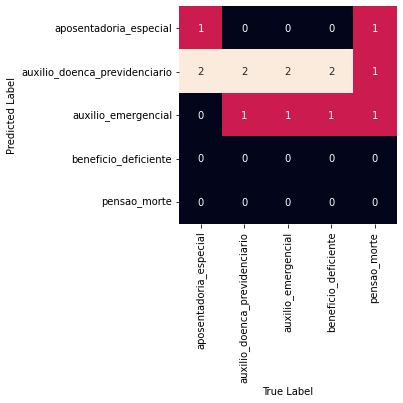

In [37]:
mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

### **Tentativa 2**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as petições. Observação:

use TF-IDF para pré-processar o texto.

use **Random Forest** como classificador.

imprimir o relatório de classificação.

In [38]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
pipeline_random_forest = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
pipeline_random_forest.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = pipeline_random_forest.predict(X_test)

In [39]:
# imprimir uma matriz de confusão e um relatório de classificação
print(classification_report(y_test, y_pred))

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_especial', 'auxilio_doenca_previdenciario', 'auxilio_emergencial', 'beneficio_deficiente', 'pensao_morte']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_especial', 'auxilio_doenca_previdenciario', 'auxilio_emergencial', 'beneficio_deficiente', 'pensao_morte']
              ])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Previsto  \
                                      aposentadoria_especial   
Amostra aposentadoria_especial                             3   
        auxilio_doenca_previdenciario                      0   
        auxilio_emergencial                                0   
        beneficio_deficiente                               0   
        pensao_morte                                       0   

                                                                     \
                                      auxilio_doenca_previdenciario   
Amostra aposentadoria_especial                                    0   
        auxilio_doenca_previdenciario                             3   
        auxilio_emergencial                                       0   
        beneficio_deficiente                                      0   
        pensao_morte                                              0   

                                                           \
                                      auxilio_emergencial   
Amostra aposentadoria_especial                          0   
        auxilio_doenca_previdenciario                   0   
        auxilio_emergencial                             3   
        beneficio_deficiente                            0   
        pensao_morte                                    0   

                                                                         
                                      beneficio_deficiente pensao_morte  
Amostra aposentadoria_especial                           0            0  
        auxilio_doenca_previdenciario                    0            0  
        auxilio_emergencial                              0            0  
        beneficio_deficiente                             3            0  
        pensao_morte                                     0            3

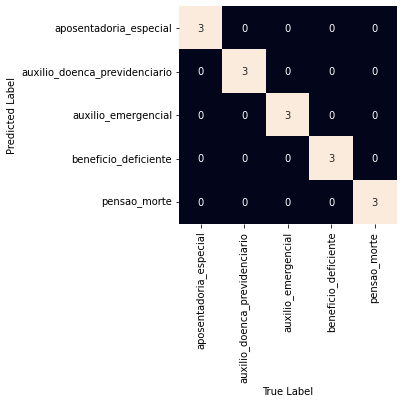

In [40]:
mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

### **Tentativa 3**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as petições. Observação:

use TF-IDF para pré-processar o texto.

use **SVM** como classificador.

imprimir o relatório de classificação.


In [41]:
from sklearn.svm import SVC

#1. create a pipeline object
pipeline_svc = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('SVC', SVC(kernel = 'linear'))         
])

#2. fit with X_train and y_train
pipeline_svc.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = pipeline_svc.predict(X_test)

In [42]:
# imprimir uma matriz de confusão e um relatório de classificação
print(classification_report(y_test, y_pred))

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_especial', 'auxilio_doenca_previdenciario', 'auxilio_emergencial', 'beneficio_deficiente', 'pensao_morte']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_especial', 'auxilio_doenca_previdenciario', 'auxilio_emergencial', 'beneficio_deficiente', 'pensao_morte']
              ])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



Previsto  \
                                      aposentadoria_especial   
Amostra aposentadoria_especial                             3   
        auxilio_doenca_previdenciario                      0   
        auxilio_emergencial                                0   
        beneficio_deficiente                               0   
        pensao_morte                                       0   

                                                                     \
                                      auxilio_doenca_previdenciario   
Amostra aposentadoria_especial                                    0   
        auxilio_doenca_previdenciario                             3   
        auxilio_emergencial                                       0   
        beneficio_deficiente                                      0   
        pensao_morte                                              0   

                                                           \
                                      auxilio_emergencial   
Amostra aposentadoria_especial                          0   
        auxilio_doenca_previdenciario                   0   
        auxilio_emergencial                             3   
        beneficio_deficiente                            0   
        pensao_morte                                    0   

                                                                         
                                      beneficio_deficiente pensao_morte  
Amostra aposentadoria_especial                           0            0  
        auxilio_doenca_previdenciario                    0            0  
        auxilio_emergencial                              0            0  
        beneficio_deficiente                             3            0  
        pensao_morte                                     0            3

In [43]:
print(classificacao_peticoes_dicionario)

{'aposentadoria_especial': 0, 'auxilio_doenca_previdenciario': 1, 'auxilio_emergencial': 2, 'beneficio_deficiente': 3, 'pensao_morte': 4}


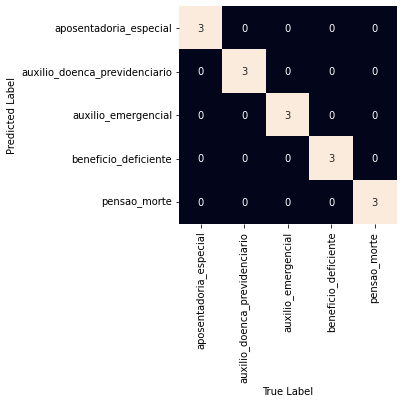

In [44]:
mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

# **Utilizando Cross-Validation**

In [45]:
from sklearn.model_selection import KFold

validacao_cruzada = KFold(n_splits=6, shuffle=True, random_state=2022)
validacao_cruzada

KFold(n_splits=6, random_state=2022, shuffle=True)

In [46]:
# Acurácia média para Vizinhos mais próximos
from sklearn.model_selection import cross_val_score

acuracia_media_vp = cross_val_score(pipeline_vizinhos_proximos, df_peticoes_iniciais['text_clean'], df_peticoes_iniciais['label_num'], cv=validacao_cruzada)
acuracia_media_vp

array([0.4       , 0.2       , 0.4       , 0.33333333, 0.26666667,
       0.26666667])

In [47]:
acuracia_media_vp.mean()

0.31111111111111106

In [48]:
# Acurácia média para random forest

acuracia_media_rf = cross_val_score(pipeline_random_forest, df_peticoes_iniciais.text_clean, df_peticoes_iniciais.label_num, cv=validacao_cruzada)
acuracia_media_rf

array([0.93333333, 1.        , 0.86666667, 0.86666667, 0.93333333,
       0.93333333])

In [49]:
acuracia_media_rf.mean()

0.9222222222222222

In [50]:
# Acurácia média para SVM

acuracia_media_svm = cross_val_score(pipeline_svc, df_peticoes_iniciais.text_clean, df_peticoes_iniciais.label_num, cv=validacao_cruzada)
acuracia_media_svm

array([0.93333333, 1.        , 0.86666667, 0.93333333, 1.        ,
       0.93333333])

In [51]:
acuracia_media_svm.mean()

0.9444444444444445

In [52]:
y_train

62    3
40    2
52    2
64    3
80    4
     ..
20    1
85    4
59    3
28    1
2     0
Name: label_num, Length: 75, dtype: int64

# **Fazendo Upload de arquivos e realizando predição**

In [59]:
def predict_category(texto, train=y_train,model=pipeline_svc):
    pred = model.predict([texto])
    return pred

In [54]:
predict_category('EXCELENTÍSSIMO SENHOR JUIZ FEDERAL DO JUIZADO ESPECIAL FEDERALCÍVEL DE PERNAMBUCO')

array([1])

In [58]:
# Fazer upload de petição
from google.colab import files
import io, pdftotext
upload = files.upload()
filename = list(upload.keys())[0]
print(filename)

with open(filename, "rb") as f:
    pdf = pdftotext.PDF(f)

texto_documento = "\n\n".join(pdf)


texto_documento = texto_documento.lower()

texto_documento = clean_text(texto_documento)

texto_documento = remove_stopwords(texto_documento)
print(texto_documento)
prediction_teste=predict_category(texto_documento)
print(prediction_teste)
print(type(prediction_teste))
if prediction_teste == [0]:
  print('Aposentadoria especial.')
elif prediction_teste == [1]:
  print('Auxilio_doenca previdenciario')
elif prediction_teste == [2]:
  print('Auxilio emergencial')
elif prediction_teste == [3]:
  print('Beneficio deficiente')
else:
  print('Pensao morte')
     

Saving Petição inicial - 0022237-12.2022.4.05.8300.pdf to Petição inicial - 0022237-12.2022.4.05.8300.pdf
Petição inicial - 0022237-12.2022.4.05.8300.pdf
justiça federal região pje processo judicial eletrônico número classe procedimento juizado especial cível órgão julgador vara federal última distribuição valor causa rmoneysymb assuntos auxílio emergencial lei segredo justiça justiça gratuita sim pedido liminar antecipação tutela sim partes procurador terceiro vinculado jaquitan jorge cruz autor união federal reu documentos data documento tipo assinatura petição inicial petição inicial juízo varas juizados especiais federais seção judiciária pernambuco nome autora jaquitan jorge cruz cpf ssp data nascimento nome mãe francisca maria cruz estado civil solteiro profissão desempregado superior incompleto endereço completo rua padre teofilo tworz cpf bongi telefone contato mail cidade onde mora recife dados sobre nome grau renda grupo familiar parentesco jaquitan jorge autor rmoneysymb cru

In [56]:
classificacao_peticoes_dicionario

{'aposentadoria_especial': 0,
 'auxilio_doenca_previdenciario': 1,
 'auxilio_emergencial': 2,
 'beneficio_deficiente': 3,
 'pensao_morte': 4}